# Imports and definitions

In [1]:
from XRDXRFutils.notebook_utils import *
from numpy import exp, real
from scipy.special import lambertw
from scipy.optimize import fsolve


def Dy_calc(y_sep, mu_1, mu_2):  # Calculate Delta y from y of separation
    return 1/mu_2 - 1/mu_1 + y_sep/(1 - exp(- mu_1 * y_sep))

def f_solver(y_sep, mu_1, mu_2, D_y):  # Function whose root is y separation
    return Dy_calc(y_sep, mu_1, mu_2) - D_y

def y_sep_calc(D_y, mu_1, mu_2):  # Calculate y of separation from Delta y
    xi = mu_1 / mu_2 - mu_1 * D_y - 1
    if xi >= 0:
        W = nan
    elif xi > -1:
        W = real(lambertw(xi * exp(xi), k = -1))
    else:
        W = real(lambertw(xi * exp(xi), k = 0))
    return (W - xi) / mu_1


### Output ###
path_output = 'Stratigraphy/'

paths_to_create_delete = [path_output]

#### To reset results, delete output folders.
WARNING: every previous result will be lost. Use only if you want to delete all files in the data folders

In [2]:
do_you_want_to_delete = False
if do_you_want_to_delete:
    for path_sel in paths_to_create_delete:
        if isdir(path_sel):
            rmtree(path_sel)

#### Check if output folders exist. If not, create them.

In [3]:
for path_sel in paths_to_create_delete:
    if not isdir(path_sel):
        makedirs(path_sel)

# Plots for theory

### Solutions given by Lambert $W$ function

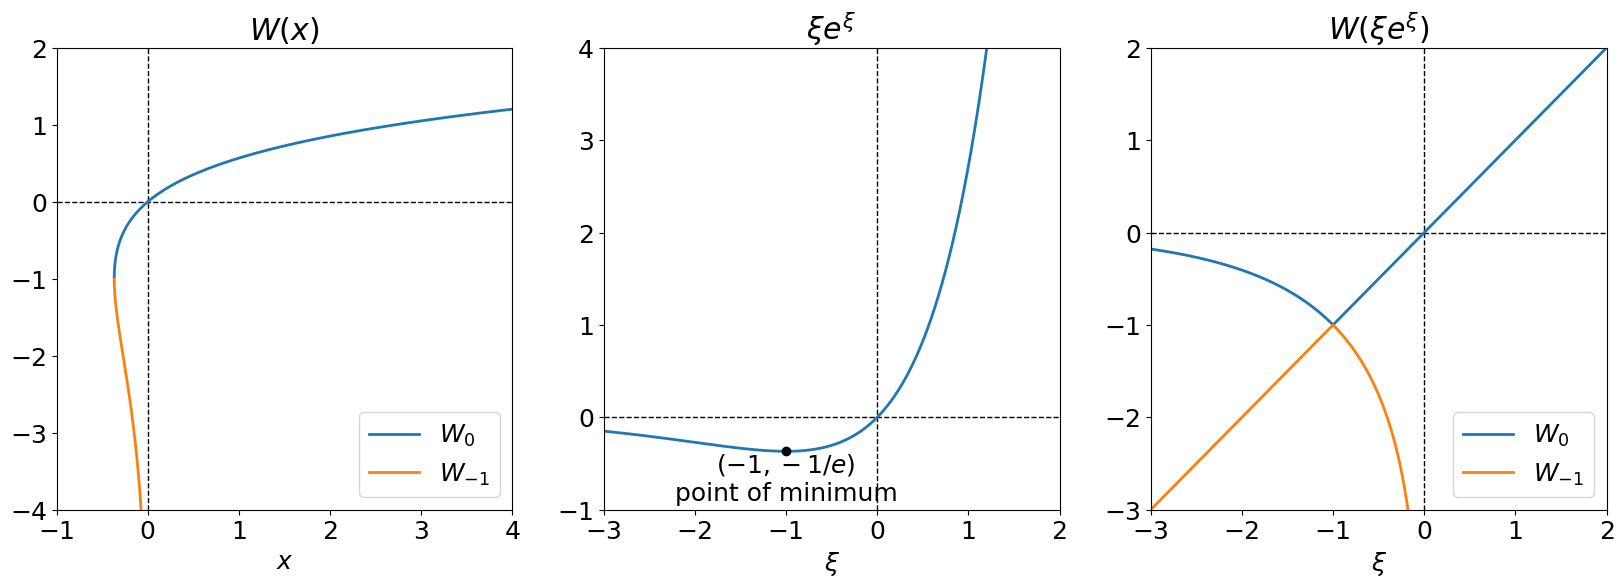

In [4]:
rcParams['font.size'] = 18

fig, axs = subplots(1, 3, figsize = (20, 6))
#fig.tight_layout(h_pad = 5, w_pad = 4)

### W(x) ###

x0_min = - 1/exp(1)
x0_max = 4
x_0 = arange(x0_min, x0_max, (x0_max - x0_min)/1e5)

x1_min = x0_min
x1_max = 0
x_1 = arange(x1_min, x1_max, (x1_max - x1_min)/1e5)

ax = axs[0]
ax.axvline(x = 0, c = 'black', ls = '--', lw = 1)
ax.axhline(y = 0, c = 'black', ls = '--', lw = 1)
ax.plot(x_0, real(lambertw(x_0, k = 0)), lw = 2, label = r'$W_0$')
ax.plot(x_1, real(lambertw(x_1, k = -1)), lw = 2, label = r'$W_{-1}$')
ax.legend(frameon = True, loc = 'lower right')
ax.set_xlim(-1, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel(r'$x$')
ax.set_title(r'$W(x)$')

### x e^x ###

def f(x):
    return x * exp(x)
x_min = -3
x_max = 2
x = arange(x_min, x_max, (x_max - x_min)/1e4)

ax = axs[1]
ax.axvline(x = 0, c = 'black', ls = '--', lw = 1)
ax.axhline(y = 0, c = 'black', ls = '--', lw = 1)
ax.plot(x, f(x), lw = 2)
ax.scatter(-1, -1/exp(1), c = 'black', zorder = 10)
ax.annotate(f'$(-1, -1/e)$\npoint of minimum', (-1, -1/exp(1)), ha = 'center', va = 'top')
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1, 4)
ax.set_title(r'$\xi e^\xi$')
ax.set_xlabel(r'$\xi$')
#ax.set_ylabel(r'$y$')

### W(x e^x) ###

x0_min = - 3
x0_max = 2
x_0 = arange(x0_min, x0_max, (x0_max - x0_min)/1e4)

x1_min = x0_min
x1_max = 0
x_1 = arange(x1_min, x1_max, (x1_max - x1_min)/1e4)

ax = axs[2]
ax.axvline(x = 0, c = 'black', ls = '--', lw = 1)
ax.axhline(y = 0, c = 'black', ls = '--', lw = 1)
ax.plot(x_0, real(lambertw(f(x_0), k = 0)), lw = 2, label = r'$W_0$')
ax.plot(x_1, real(lambertw(f(x_1), k = -1)), lw = 2, label = r'$W_{-1}$')
ax.legend(frameon = True, loc = 'lower right')
ax.set_xlim(x_min, x_max)
ax.set_ylim(-3, 2)
ax.set_title(r'$W(\xi e^\xi)$')
ax.set_xlabel(r'$\xi$')
#ax.set_ylabel(r'$W$')

savefig(f'{path_output}Lambert_W.png', bbox_inches = 'tight', dpi = 150)
show()
close(fig)

### Exponential attenuation

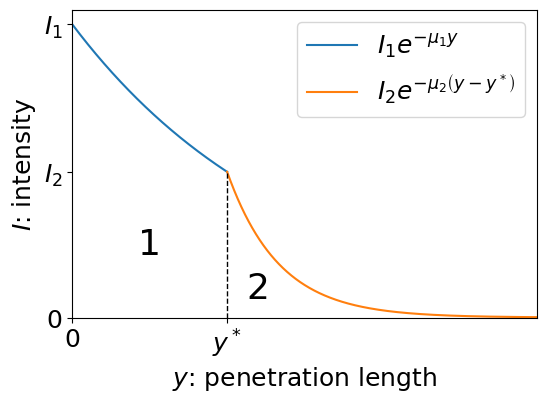

In [76]:
rcParams['font.size'] = 18
dy = 1e-5
y_s = 1
y_1 = arange(0, y_s, dy)
I_1 = 1
mu_1 = 0.7
i_1 = I_1 * exp(- mu_1 * y_1)
y_2 = arange(y_s, 3, dy)
I_2 = i_1[-1]
mu_2 = 3
i_2 = I_2 * exp(- mu_2 * (y_2 - y_1[-1]))

fig, ax = subplots(figsize = (6, 4))
ax.plot(y_1, i_1, label = r'$I_1 e^{- \mu_1 y}$')
ax.plot(y_2, i_2, label = r'$I_2 e^{- \mu_2 \left( y - y^* \right)}$')
ax.vlines(y_s, 0, I_2, color = 'black', ls = '--', lw = 1)
ax.text(y_s / 2, I_2 / 2, '1', ha = 'center', va = 'center', size = 'x-large')
ax.text(y_s + 0.2, 0.1, '2', ha = 'center', va = 'center', size = 'x-large')

ax.set_xticks([0, y_s])
ax.set_xticklabels(['0', r'$y^*$'])
ax.set_yticks([0, I_1, I_2])
ax.set_yticklabels(['0', r'$I_1$', r'$I_2$'])

ax.set_xlim(0, 3)
ax.set_ylim(0, None)
ax.set_xlabel(r'$y$: penetration length')
ax.set_ylabel(r'$I$: intensity')
ax.legend(frameon = True, loc = 'upper right')
show()

# Plots for verification

### Choose separation depth and absorptions

In [75]:
y_sep = 391   # y of separation
mu_1 = 1/130
mu_2 = 1/200

D_y = Dy_calc(y_sep, mu_1, mu_2)
print(f'Delta y = {D_y}')

Delta y = 481.32157269649895


### Find separation depth from $\Delta y, \lambda_1, \lambda_2$

In [6]:
D_y = 391
mu_1 = 1/200
mu_2 = 1/130

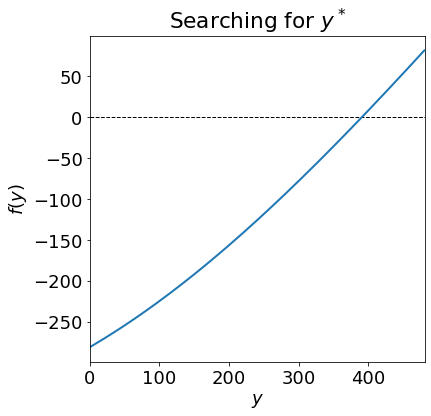

Numerical solution: y = 391.00000000000006
Analytical solution: y = 391.00000000000006


In [8]:
rcParams['font.size'] = 18

h_min = 0
h_max = D_y #3 * y_sep

y = arange(h_min, h_max, (h_max - h_min)/1000)[1:]

fig, ax = subplots(figsize = (6, 6))
ax.axhline(y = 0, c = 'black', ls = '--', lw = 1)
ax.plot(y, f_solver(y, mu_1, mu_2, D_y), lw = 2, label = 'XRD pattern')
ax.set_xlim(h_min, h_max)
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$f(y)$')
ax.set_title(r'Searching for $y^*$')
show()

y_numerical = fsolve(f_solver, D_y, args = (mu_1, mu_2, D_y))[0]
y_analytical = y_sep_calc(D_y, mu_1, mu_2)
print(f'Numerical solution: y = {y_numerical}')
print(f'Analytical solution: y = {y_analytical}')

# Calculations from actual experimental values

In [ ]:
beta = 50.710
D_a = -70